In [1]:
import pandas as pd

In [21]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np 

In [3]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
import joblib

In [10]:
df = pd.read_csv("construction_delay_data.csv")

In [11]:
print("Dataset Sample:\n", df.head())

Dataset Sample:
   Project_Size Weather_Conditions Labor_Availability Material_Availability  \
0        Large              Clear       Insufficient               On-time   
1        Large               Snow         Sufficient               On-time   
2        Large               Rain       Insufficient               Delayed   
3        Large              Clear         Sufficient               On-time   
4        Large              Clear       Insufficient               On-time   

  Site_Conditions Government_Approvals Budget_Issues Equipment_Availability  \
0        Moderate             Approved           Yes                Delayed   
1        Moderate              Pending            No                Delayed   
2        Moderate             Approved           Yes                Delayed   
3        Moderate              Pending            No                Delayed   
4             Bad              Pending           Yes              Available   

   Planned_Duration_Days  Actual_Comple

In [12]:
categorical_columns = [
    "Project_Size", "Weather_Conditions", "Labor_Availability",
    "Material_Availability", "Site_Conditions", "Government_Approvals",
    "Budget_Issues", "Equipment_Availability"
]

In [13]:
# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
# Split dataset into features and target variable
X = df.drop(columns=["Actual_Completion_Days"])
y = df["Actual_Completion_Days"]

In [15]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predict on test data
y_pred = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} days")

Mean Absolute Error: 15.54 days


In [19]:
# Save trained model and label encoders
joblib.dump(model, "construction_delay_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

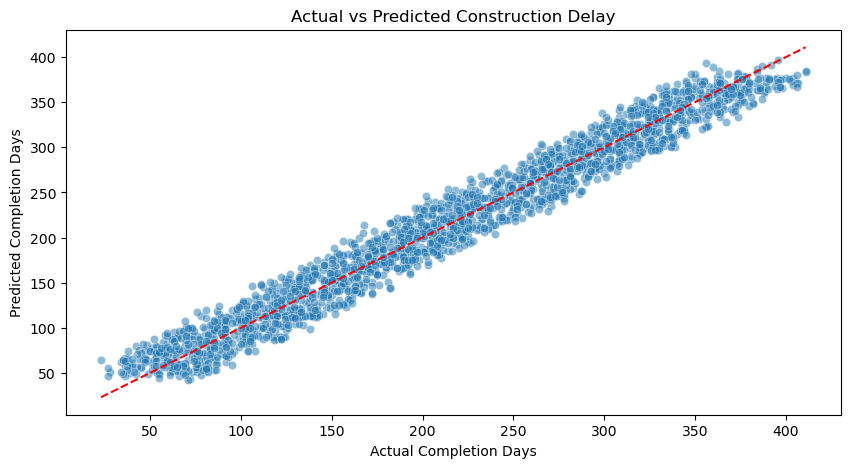

In [24]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Completion Days")
plt.ylabel("Predicted Completion Days")
plt.title("Actual vs Predicted Construction Delay")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.show()

C:\Users\BIBHAV KUMAR\AppData\Local\Temp\ipykernel_9104\1074879384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


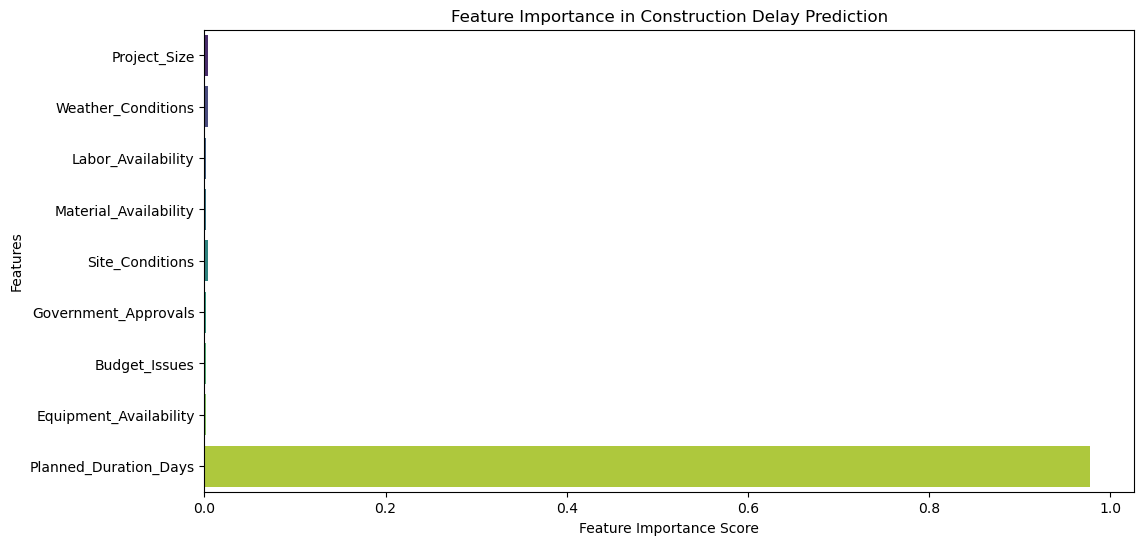

In [26]:
# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Construction Delay Prediction")
plt.show()